In [1]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wavelength_nm = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5



print(dipoles.initial_field(wavelength_nm, angle, 1, eps_Au, point, phase, a))


p, m =  dipoles.calc_dipoles_v2(wavelength_nm, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
print(np.round(p,39))

print(np.round(m,34))

# p2,m2 = dipoles.calc_dipoles(wavelength_nm, eps_Au, 40, R, eps_Si, point, angle, amplitude=1, phase=phase, a=a)

# print(np.round(p2,39))

# print(np.round(m2,34))


wl = np.linspace(600, 1200, 60)

Px=[]
Py=[]
Pz=[]
Mx=[]
My=[]
Mz=[]

# res = np.empty((3,len(wl)))
for i in tqdm(range(len(wl))):

    p,m =  dipoles.calc_dipoles_v2(wl[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    Px.append(p[0])
    Py.append(p[1])
    Pz.append(p[2])
    Mx.append(m[0])
    My.append(m[1])
    Mz.append(m[2])

  

(array([[0.27747304-1.22425j   ],
       [0.25039754-1.35334001j],
       [0.0973912 +0.01790005j]]), array([[ 0.00068853+0.00010798j],
       [-0.0006117 -0.00011243j],
       [ 0.0002809 -0.00151818j]]))
[[ 1.41479539e-31+2.05676844e-31j]
 [ 1.64312551e-31+2.19043750e-31j]
 [-9.49038800e-33+1.82580310e-32j]]
[[ 4.41970509e-24+1.57708522e-23j]
 [-3.66961395e-24-1.46333469e-23j]
 [ 8.90527125e-25+2.01629808e-23j]]


  5%|▌         | 3/60 [00:01<00:34,  1.67it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 48%|████▊     | 29/60 [00:19<00:21,  1.42it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:41<00:00,  1.43it/s]


In [ ]:
dipoles = np.loadtxt('comsol/dipoles 146 sub p.txt', skiprows=8, delimiter=',')

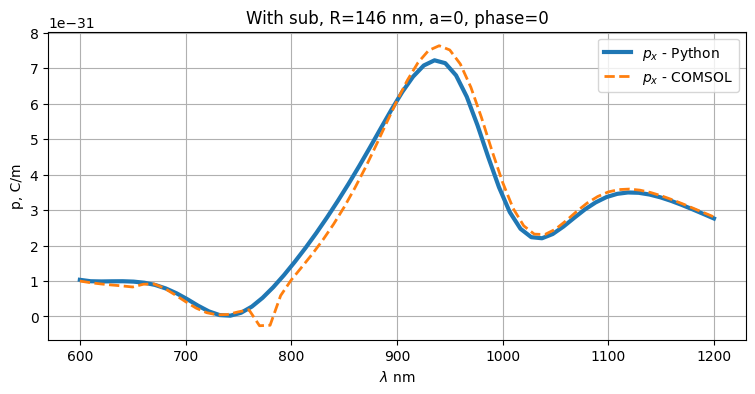

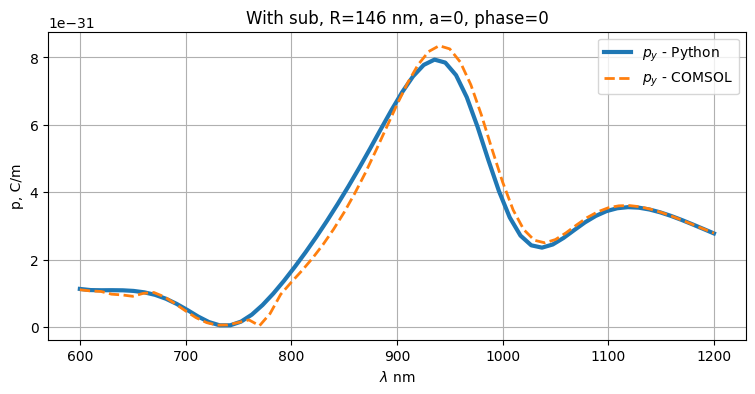

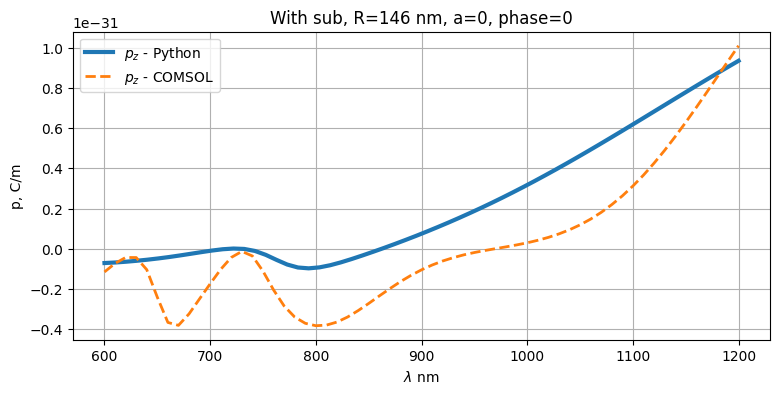

In [19]:
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Px), label='$p_x$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,1], label='$p_x$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
#plt.xlim(700,840)
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Py), label='$p_y$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,2], label='$p_y$ - COMSOL', linestyle='dashed', lw=2)
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Pz), label ='$p_z$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,3], label='$p_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

In [3]:
mdipoles = np.loadtxt('comsol/dipoles 146 sub m.txt', skiprows=8, delimiter=',')

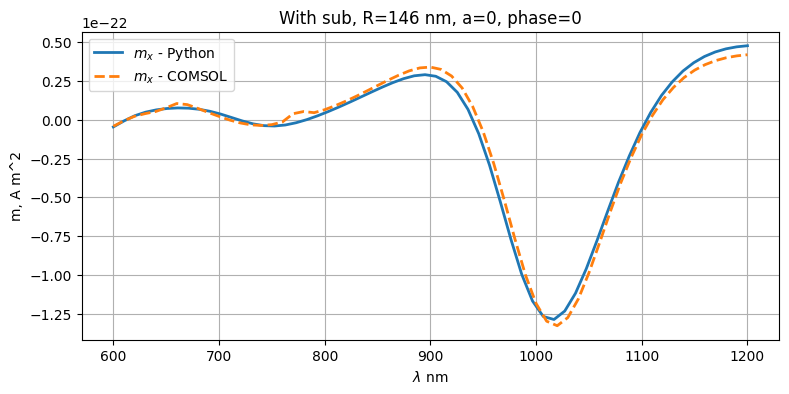

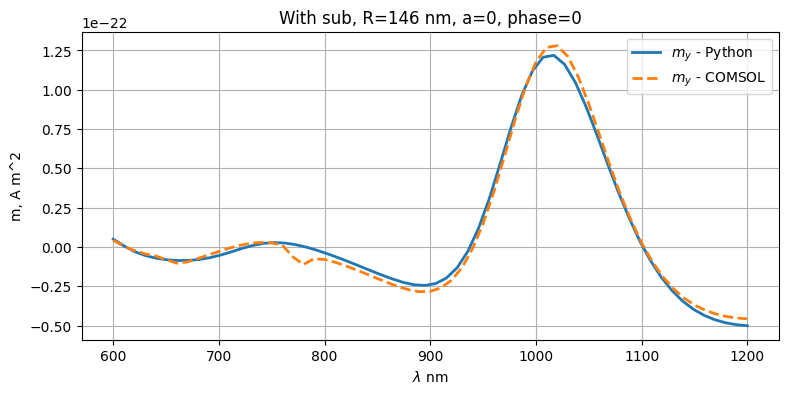

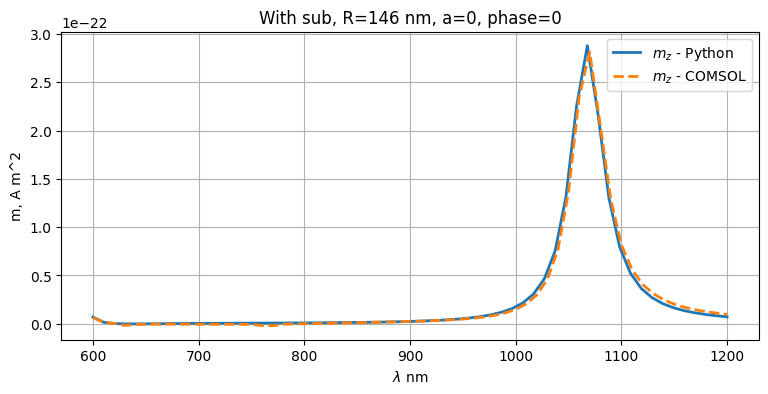

In [4]:
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Mx), label='$m_x$ - Python', lw=2) 
plt.plot(mdipoles[:,0], mdipoles[:,1], label='$m_x$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()
 
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(My), label='$m_y$ - Python', lw=2)
plt.plot(mdipoles[:,0], mdipoles[:,2], label='$m_y$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()
  
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Mz), label='$m_z$ - Python', lw=2)   
plt.plot(mdipoles[:,0], mdipoles[:,3], label='$m_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()

In [1]:
import numpy as np
import force
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import dipoles

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5



print(dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP ))

print(force.F(wl, eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP))



wls = np.linspace(600,1200, 50)
F_x = np.empty_like(wls)
F_y = np.empty_like(wls)
F_z = np.empty_like(wls)
for i in tqdm(range(len(wls))):
    F_x[i], F_y[i], F_z[i] = force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP)

(array([[ 1.41479539e-31+2.05676844e-31j],
       [ 1.64312551e-31+2.19043750e-31j],
       [-9.49038844e-33+1.82580311e-32j]]), array([[ 4.41970509e-24+1.57708522e-23j],
       [-3.66961395e-24-1.46333469e-23j],
       [ 8.90527125e-25+2.01629808e-23j]]))
(np.float64(7.872339085495028e-25), np.float64(5.982173399768563e-26), np.float64(-9.02253638253081e-25))


 48%|████▊     | 24/50 [00:36<00:41,  1.59s/it]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [01:15<00:00,  1.51s/it]


In [ ]:
p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
p = p[:,0]
E0, H0 = dipoles.initial_field(wl, angle, 1, eps_Au, point, phase, a)
E0=E0[:,0]
k= 2*np.pi/wl/1e-9
kx = k*np.sin(angle)

print(np.conj(p)*E0*kx*1j)

Fx_e0 = 0.5*np.real(np.sum(np.conj(p)*E0*kx*1j))
print(Fx_e0)

Fx_e0 = 0.5*np.imag((np.conj(p)@E0*kx))
print(Fx_e0)

[7.64340753e-25-7.05480785e-25j 9.20154528e-25-8.47391710e-25j
 6.46603769e-27-1.98311287e-27j]
8.454806592668274e-25
-8.454806592668274e-25


In [7]:
print(dipoles.initial_field(wl, angle, 1, eps_Au, point, phase, a))

(array([[0.27747304-1.22425j   ],
       [0.25039754-1.35334001j],
       [0.0973912 +0.01790005j]]), array([[ 0.00068853+0.00010798j],
       [-0.0006117 -0.00011243j],
       [ 0.0002809 -0.00151818j]]))


In [35]:
f_xz_0 = np.loadtxt('comsol/f_xz_e0_m0.txt', skiprows=8, delimiter=',')

In [3]:
force_comsol = np.loadtxt('comsol/force_sub_146_a_05.txt', skiprows=8, delimiter=',')

Text(0.5, 0, '$\\lambda$')

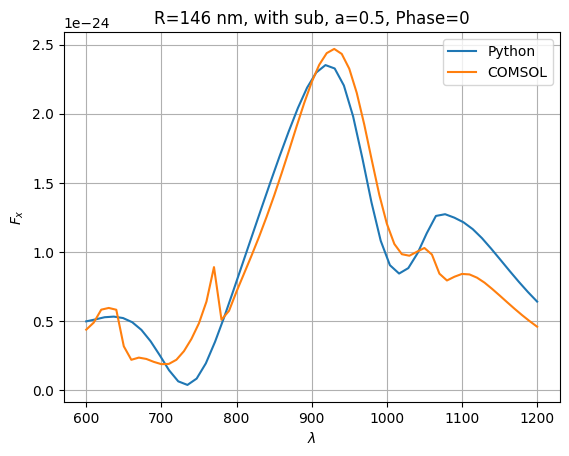

In [10]:
import matplotlib.pyplot as plt
plt.plot(wls, F_x, label='Python')
plt.ylabel('$F_x$')
plt.plot(force_comsol[:,0],force_comsol[:,1], label='COMSOL' )
plt.legend()
plt.grid()
plt.title('R=146 nm, with sub, a=0.5, Phase=0')
plt.xlabel('$\lambda$')

Text(0.5, 0, '$\\lambda$')

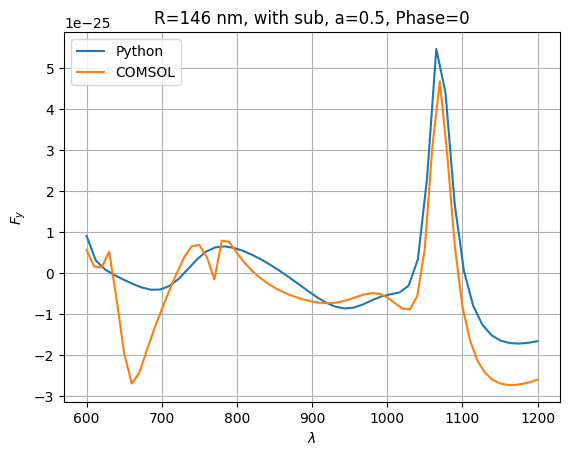

In [11]:
plt.plot(wls, F_y, label='Python')
plt.ylabel('$F_y$')
plt.plot(force_comsol[:,0],force_comsol[:,2], label='COMSOL' )
plt.legend()
plt.grid()
plt.title('R=146 nm, with sub, a=0.5, Phase=0')
plt.xlabel('$\lambda$')

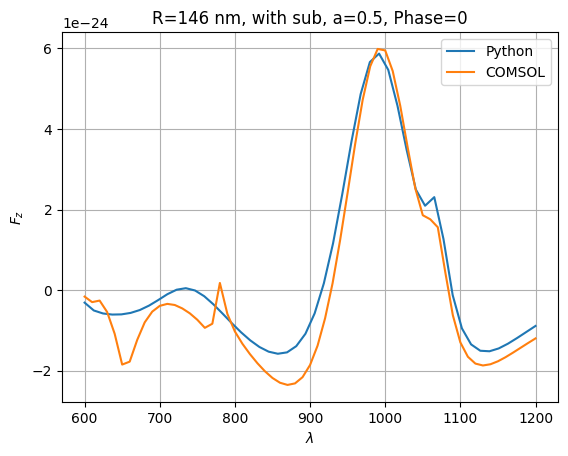

In [ ]:
plt.plot(wls, F_z, label='Python')
plt.plot(force_comsol[:,0],force_comsol[:,3], label='COMSOL' )
plt.legend()
plt.ylabel('$F_z$')
plt.title('R=146 nm, with sub, a=0.5, Phase=0')
plt.xlabel('$\lambda$')
plt.grid()

In [4]:
import green_func
import frenel
import numpy as np
import matplotlib.pyplot as plt

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0


dy_Green_E_yz = []

# wls = np.linspace(600,1200,30)
# for wl in wls:
#     dy_Green_E_yz.append(green_func.dy_green_E_H_yz())

print(green_func.dz_green_E_H(wl, point[2], eps_Au, np.inf))

(array([[-1.13792717e+12+1.10183557e+12j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j, -1.13792717e+12+1.10183557e+12j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -1.55132578e+12-1.72269781e+12j]]), array([[7.98068602e+11-1.48331780e+12j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 7.98068602e+11-1.48331780e+12j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        8.71608647e+11+9.59733359e+11j]]))


Прислать параметры и дипольные моменты!